In [4]:
!pip install transformers underthesea torch numpy pandas



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
model = AutoModel.from_pretrained("vinai/phobert-base")

c:\Users\quang\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
with open(r"D:\NCKH\Tokenizer\word_segment_ques.txt", "r", encoding="utf-8") as f:
    sentences = [line.strip() for line in f if line.strip()]

Khúc này để xử lý mấy ngoại lệ bị lỗi với lấy embedding từng dòng

In [7]:
def get_embedding(text):
    if not text.strip():  
        return np.zeros(768)  
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        return outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    except Exception as e:
        print("Lỗi với câu:", text, "\nChi tiết:", e)
        return np.zeros(768)

In [8]:
import numpy as np

embeddings = []
for sent in sentences:
    emb = get_embedding(sent)
    embeddings.append(emb)

embeddings = np.array(embeddings)
print("Shape embeddings:", embeddings.shape)  # (số_câu, 768)



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Shape embeddings: (56, 768)


Muốn save sang npy thì chạy block này


In [9]:
np.save("D:/NCKH/Tokenizer/embeddings.npy", embeddings)
print("Đã lưu embeddings vào embeddings.npy")


Đã lưu embeddings vào embeddings.npy


Còn muốn save sang csv để check thì như này

In [10]:
import pandas as pd

df = pd.DataFrame(embeddings)
df.insert(0, "sentence", sentences)  # thêm cột câu gốc

df.to_csv("D:/NCKH/Tokenizer/embeddings.csv", index=False, encoding="utf-8")
print("Đã lưu embeddings vào embeddings.csv")

Đã lưu embeddings vào embeddings.csv



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


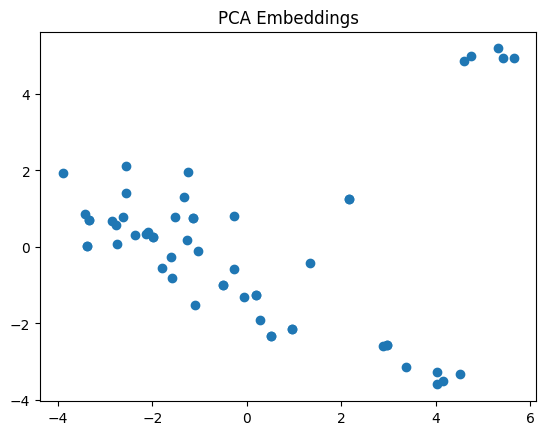

In [11]:
!pip install matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.scatter(reduced[:,0], reduced[:,1])
plt.title("PCA Embeddings")
plt.show()